In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

data_file = open("mnist_train.csv","r")
data_list = data_file.readlines()
data_file.close()

In [11]:
len(data_list)

60000

In [12]:
train_data, test_data = train_test_split(data_list,test_size=0.3) 
len(train_data)

42000

In [13]:
# first value is label, rest is data
train_data[0]

'1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,255,139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,253,251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,197,254,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,251,253,251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,254,253,254,196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,253,251,253,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,254,253,226,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,253,251,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,253,254,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,253,251,253,251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,254,253,226,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

1


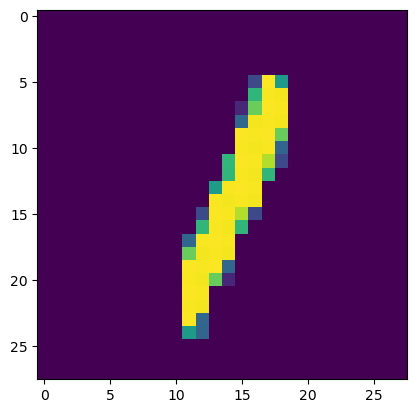

In [14]:
all_values = train_data[0].split(",")
print(all_values[0])

# reshaping each row into 28x28 data
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array)

In [30]:
# Neural network with a single hidden layer
# input layer contains 784 = 28x28 nodes
# number of nodes in hidden layer = n (to be experimented)
# output layer contains 10 nodes for each numbers (0to 9)

class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learningrate = learning_rate
        self.Weight_input_hidden = np.random.uniform(-1, 1, size = (hidden_nodes,input_nodes))
        self.Weight_hidden_output = np.random.uniform(-1, 1, size = (output_nodes,hidden_nodes))
        
    def query(self,inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        hidden_outputs = sigmoid(np.dot(self.Weight_input_hidden,inputs))
        final_outputs = sigmoid(np.dot(self.Weight_hidden_output,hidden_outputs))
        return final_outputs
    
    def train(self,inputs_list,targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_outputs = sigmoid(np.dot(self.Weight_input_hidden,inputs))
        final_outputs = sigmoid(np.dot(self.Weight_hidden_output,hidden_outputs))
        
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.Weight_hidden_output.T, output_errors)
        
        self.Weight_hidden_output += self.learningrate * np.dot((output_errors * final_outputs*(1.0-final_outputs)),np.transpose(hidden_outputs))
        
        self.Weight_input_hidden +=self.learningrate * np.dot((hidden_errors * hidden_outputs*(1.0-hidden_outputs)),np.transpose(inputs))
        
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [38]:
input_nodes = 784
hidden_nodes = 50
output_nodes = 10
learning_rate = 0.1

n = NeuralNetwork(input_nodes,
                  hidden_nodes,
                  output_nodes,
                  learning_rate)

In [35]:
# Check Neural Network outputs for a given input
n.query((np.asfarray(all_values[1:])/255.0+0.99)+0.01)

array([[0.10095445],
       [0.06046473],
       [0.9609692 ],
       [0.94133083],
       [0.89608927],
       [0.51079199],
       [0.539724  ],
       [0.15615523],
       [0.94420884],
       [0.84359516]])

In [39]:
# Scale the input values to range of 0.01 to 1.00
# Target array of size 10 is initialized to 0.01 
# for given label, value in target is updated to 0.99
# for eg: label = 9 
#                    0    1    2    3    4    5     6    7   8     9
# initial target = [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 ]
# updated target = [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 ]

def train_nn(n,train_data,epochs):
    for i in range(epochs):
        for j in train_data:
            all_values = j.split(",")
            inputs = (np.asfarray(all_values[1:]) /255.0 *0.99)+0.01
            
            targets = np.zeros(output_nodes)+0.01
            targets[int(all_values[0])] = 0.99
                        
            n.train(inputs,targets)
        
        accuracy = score(n,train_data)
        print("Epoch [{}/{}], train_accuracy: {}".format(i+1, epochs, accuracy))

def score(n, data_list):
    score = []
    for i in data_list:
        labels = i.split(",")
        correct_label = int(labels[0])
    
        inputs = (np.asfarray(labels[1:]) /255.0 *0.99)+0.01
        outputs = n.query(inputs)
        label = np.argmax(outputs)
        if(label == correct_label):
            score.append(1)
        else:
            score.append(0)
          
    score = np.asarray(score)    
    performance = (score.sum()/score.size)
    return performance         

# train neural network
train_nn(n,train_data,epochs = 5)

Epoch [1/5], train_accuracy: 0.9433571428571429
Epoch [2/5], train_accuracy: 0.9565238095238096
Epoch [3/5], train_accuracy: 0.960952380952381
Epoch [4/5], train_accuracy: 0.9637142857142857
Epoch [5/5], train_accuracy: 0.9678333333333333


In [40]:
def test_nn(n,test_data):
    performance = score(n,test_data)
    return performance
    
# test the neural network
print("Test_accuracy : ",test_nn(n,test_data))

Test_accuracy :  0.9502222222222222


In [ ]:
# To find the relation between hidden nodes and accuracy
import time

score_array = []
time_array = []

arr1 = np.array([1,2,3,4,5,6,7,8,9])
arr = np.arange(10,201,10)
hidden_node_array = np.concatenate((arr1,arr),axis = None)
           
for i in hidden_node_array:
    # get the start time
    st = time.time()
    
    hidden_nodes = i
    n = NeuralNetwork(input_nodes,
                      hidden_nodes,
                      output_nodes,
                      learning_rate)
    
    train_nn(n,train_data);
    
    performance = test_nn(n,test_data)
    
    # store  performance% for plotting
    score_array.append(performance)
    
    # get the end time
    et = time.time()
    
    # get the execution time
    elapsed_time = et - st
    time_array.append(elapsed_time)
    
    if (hidden_nodes % 10 == 0):
        print((hidden_nodes/200)*100,"%...")

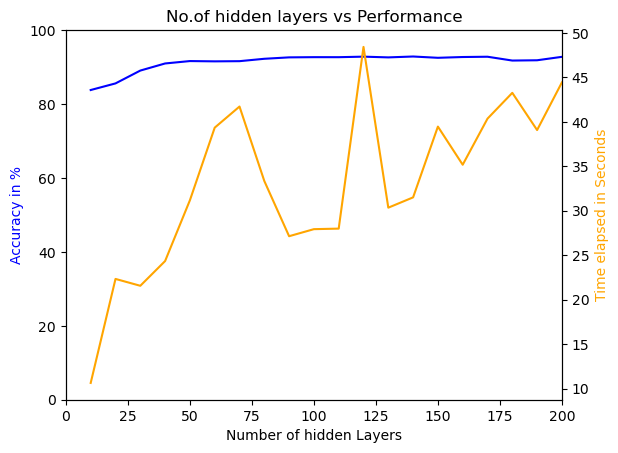

In [56]:
# Relation between Number of hidden layers and accuracy
fig, ax1 = plt.subplots()
ax1.plot(hidden_node_array,score_array,color="blue")
ax1.set_xlabel("Number of hidden nodes")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Accuracy in %",color="blue")
ax1.set_ylim(0, 100)
ax1.set_title('No.of hidden layers vs Performance')

ax2 = ax1.twinx()
ax2.set_ylabel("Time elapsed in Seconds",color="orange")
ax2.plot(hidden_node_array,time_array,color="orange" )

plt.show()